# Using Fourier to Forecast Time Series #

I got this idea several years ago from [Danny Yuan's presentation](https://youtu.be/VYpAodcdFfA).

During my initial EDA on Red Chinchompas, I noted that each month the price signal looked sinusoidal. I was then reminded of Danny Yuan's case for using a Fourier transform on time series data. The Fourier transform algorithm is computationally cheap, so a potential large payout for the forecast is present. At the very least, I can use the Fourier predictions as a benchmark for measuring performance of other models.

*Note*: It might also be possible to use the Fourier coefficients as a summary feature for a deep learning model

Forecasting with Fourier transformed data works well when the signal is periodic. My initial EDA **did not** include tests/measurements for periodicity. I will include some here.

For the purposes of this analysis, I have (somewhat arbitrarily) chosen to use the data *currently available* (that is, the data collected and saved at the time of running the cell) for a list of **invested items**. These time series will be used to train, validate, and test models going forward. As a result, other price data I have saved throughout this project will be used for backtesting.

## Invested Items ##
- Old school bond
- Dragon Bones
- Black Dragonhide
- Red Chinchompa 
- Black Chinchompa
- Magic Logs 
- Yew Longbow

In [34]:
from tradeable_item import TradeableItem
#from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
%matplotlib inline

plt.rcParams["figure.figsize"]=(16,12)

#location of all data sets
data_dir = "datasets/"

**Old School Bond** 

In [35]:
#grab the old school bond data snapshot
bond_csv = "old_school_bond_04-10-2020.csv"

bond_df = pd.read_csv(data_dir+bond_csv, index_col="Index")
bond_df.head()

,Timestamps_close,Close,Timestamps_average,Average
Index,,,,
0,2020/04/08,4134618,2020/04/08,4522980
1,2020/04/09,4009639,2020/04/09,4501601
2,2020/04/10,3903868,2020/04/10,4473252
3,2020/04/11,3853462,2020/04/11,4442300
4,2020/04/12,3941327,2020/04/12,4415261


In [36]:
#the signal to decompose
f = bond_df["Close"] 
#timestamps
timestamps = bond_df["Timestamps_close"]

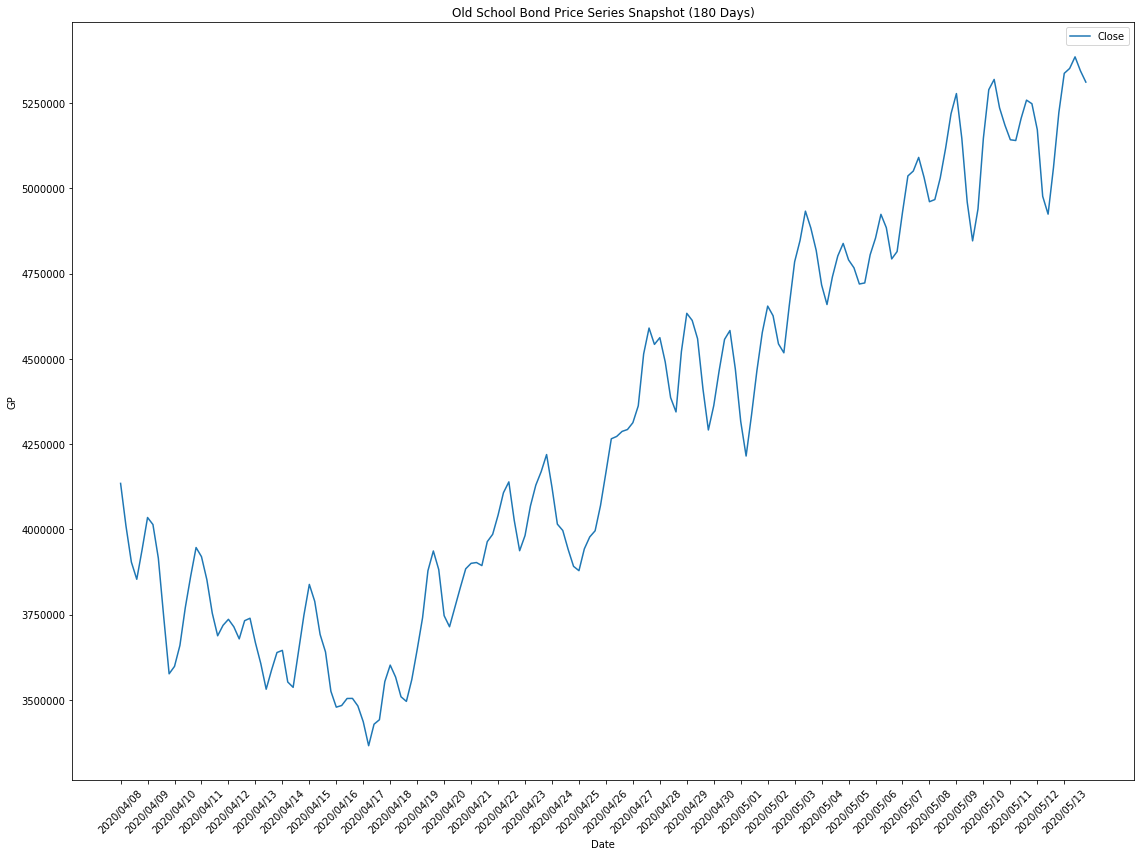

In [37]:
#plotting the closing price signal
fig, ax = plt.subplots()
ax.plot(timestamps, f)
ax.set(xlabel="Date", ylabel="GP", 
       title="Old School Bond Price Series Snapshot (180 Days)")
plt.xticks(np.arange(0, bond_df.shape[0], 5), rotation=45)
plt.legend()

The timescale on the data is 1 sample per day. This forces `dt = 1`

In [38]:
#compute the FFT

#the number of data points
n = len(timestamps)
#the time range of the data set (days since start)
t = np.arange(0, n)

#the complex coefficients desc. the transform
fhat = np.fft.fft(f, n)
#power spectral density
PSD = fhat*np.conj(f)/n
#each fhat corresponds to a sinusoid with particular frequency
freq = (1/(n)) * np.arange(n)

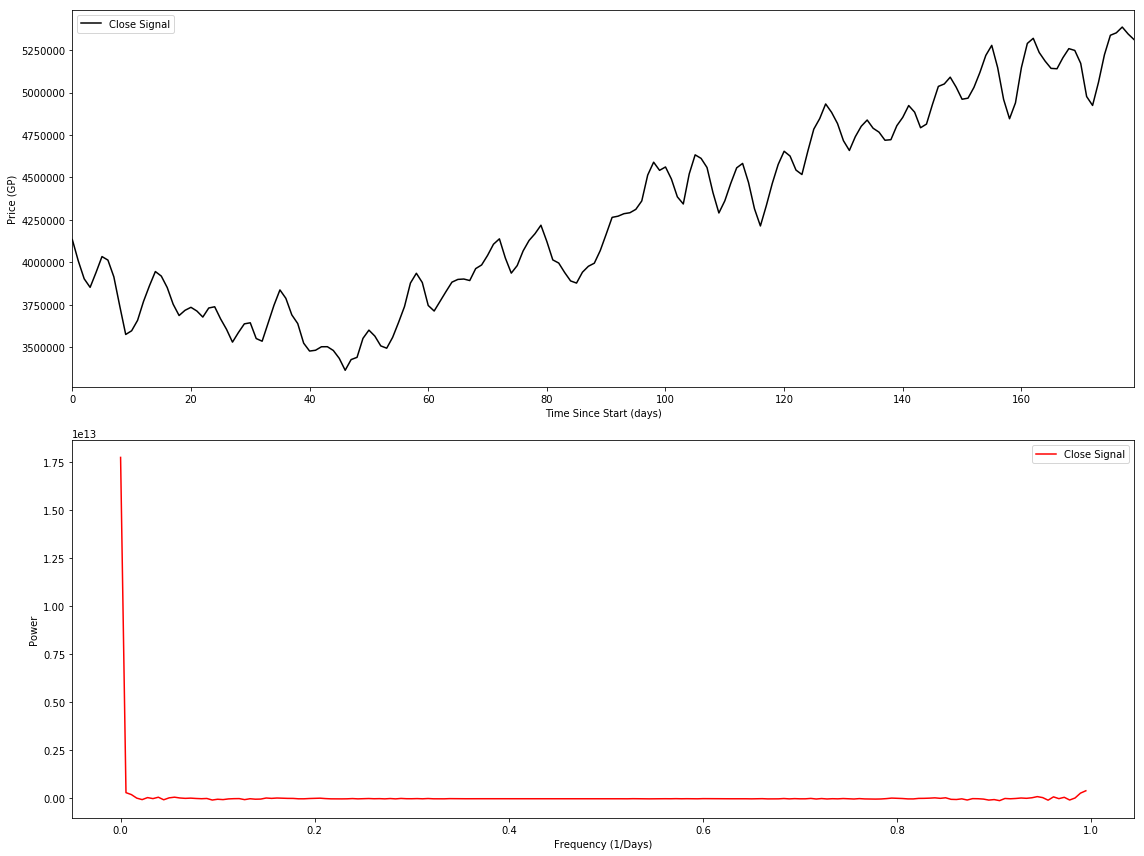

In [39]:
fig, ax = plt.subplots(2, 1)

plt.sca(ax[0])
plt.plot(t, f, color='k', label="Close Signal")
plt.xlabel("Time Since Start (days)")
plt.ylabel("Price (GP)")
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(ax[1])
plt.plot(freq, PSD, color='r', label="Close Signal")
plt.xlabel("Frequency (1/Days)")
plt.ylabel("Power")
plt.legend()

plt.show()

# Remove the Trend from Signal #

In [40]:
bond_df["Diff Close"] = bond_df["Close"].diff()
bond_df.head()

,Timestamps_close,Close,Timestamps_average,Average,Diff Close
Index,,,,,
0,2020/04/08,4134618,2020/04/08,4522980,NaN
1,2020/04/09,4009639,2020/04/09,4501601,-124979.0
2,2020/04/10,3903868,2020/04/10,4473252,-105771.0
3,2020/04/11,3853462,2020/04/11,4442300,-50406.0
4,2020/04/12,3941327,2020/04/12,4415261,87865.0


In [41]:
f_diff = bond_df["Diff Close"]
f_diff = f_diff[1:]
f_diff.head()

Index
1   -124979.0
2   -105771.0
3    -50406.0
4     87865.0
5     93286.0
Name: Diff Close, dtype: float64

In [42]:
#compute the FFT

#the number of data points
n = len(f_diff)
#the time range of the data set (days since start)
t = np.arange(0, n)

#the complex coefficients desc. the transform
fhat = np.fft.fft(f_diff, n)
#power spectral density
PSD = fhat*np.conj(fhat)/n
#each fhat corresponds to a sinusoid with particular frequency
freq = (1/(n)) * np.arange(n)

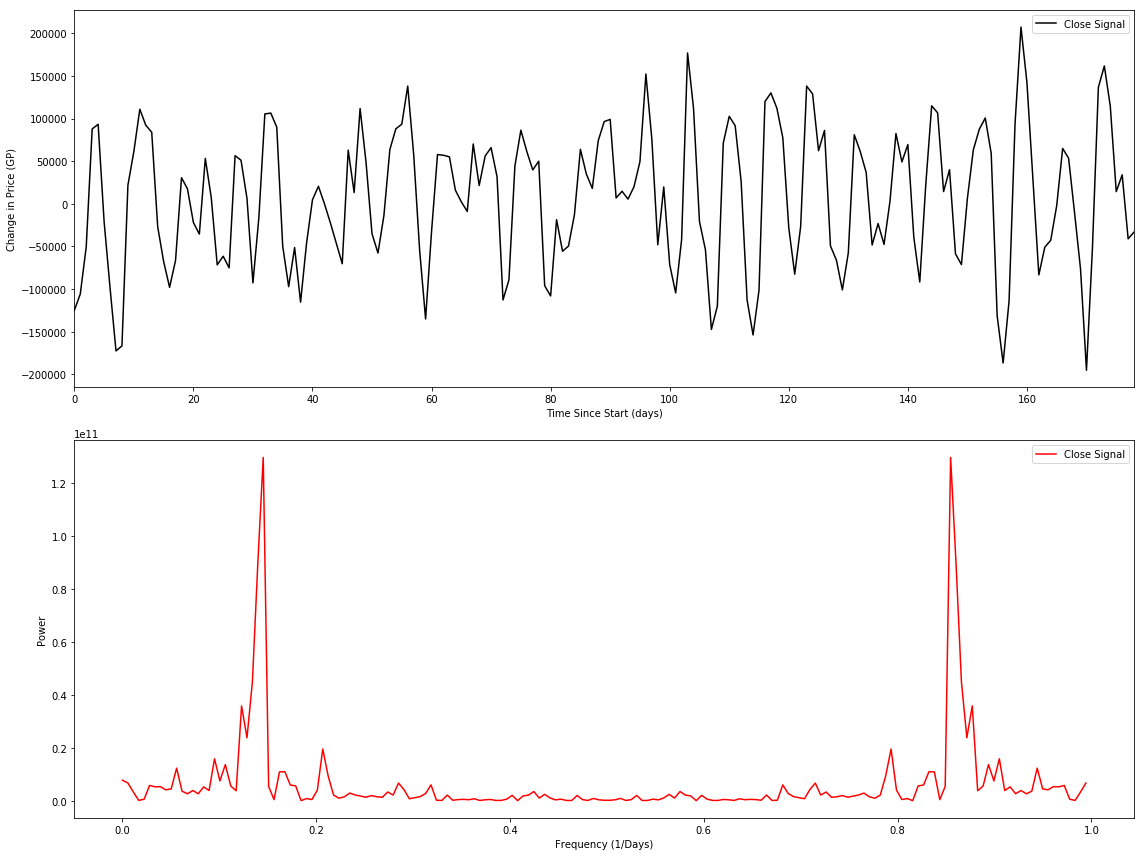

In [43]:
fig, ax = plt.subplots(2, 1)

plt.sca(ax[0])
plt.plot(t, f_diff, color='k', label="Close Signal")
plt.xlabel("Time Since Start (days)")
plt.ylabel("Change in Price (GP)")
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(ax[1])
plt.plot(freq, PSD, color='r', label="Close Signal")
plt.xlabel("Frequency (1/Days)")
plt.ylabel("Power")
plt.legend()

plt.show()